In [1]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

In [2]:
!git clone https://github.com/pratyush1019/Medical-Image-Computing
%cd Medical-Image-Computing

Cloning into 'Medical-Image-Computing'...
remote: Enumerating objects: 1717, done.
remote: Counting objects: 100% (1717/1717), done.
remote: Compressing objects: 100% (1695/1695), done.
remote: Total 1717 (delta 22), reused 1717 (delta 22), pack-reused 0
Receiving objects: 100% (1717/1717), 55.58 MiB | 37.17 MiB/s, done.
Resolving deltas: 100% (22/22), done.
/content/Medical-Image-Computing


In [3]:
from models import R2U_Net
u_net = R2U_Net()
u_net = R2U_Net().cuda()

In [4]:
from DataSetClass import RetinaDataset 
tr = torch.utils.data.DataLoader(RetinaDataset('data/training/','data/manual/'), batch_size=8, shuffle=True)

In [20]:
val = torch.utils.data.DataLoader(RetinaDataset('data/validation/','data/validation_manual/'), batch_size=8, shuffle=True)

In [5]:
import torch.optim as optim

optimizer = optim.Adam(u_net.parameters())
# criterion = F.BCELoss()
# criterion = nn.CrossEntropyLoss()
criterion = nn.functional.mse_loss

In [18]:
loss_history = []
for epoch in range(40):
    train_loss = 0.0
    for i,data in enumerate(tr):
        x, y = data
        x, y = x.cuda(), y.cuda()
        optimizer.zero_grad()
        y_pred = u_net(x)
        loss = criterion(y_pred, y)
        x = loss.item()
        train_loss += x
        if (i%10==0):
            print('(%d, %5d) item-loss: %.9f'%(epoch + 1, i + 1, x))
        loss.backward()
        optimizer.step()   
    print('[%d] epoch-loss: %.9f'%(epoch + 1, train_loss))
    loss_history.append(train_loss)
print('Finished Training')

(1,     1) item-loss: 0.073688775
(1,    11) item-loss: 0.099170022
(1,    21) item-loss: 0.073659718
(1,    31) item-loss: 0.094881728
(1,    41) item-loss: 0.074690610
[1] epoch-loss: 4.281495683
(2,     1) item-loss: 0.095404461
(2,    11) item-loss: 0.081148654
(2,    21) item-loss: 0.065417096
(2,    31) item-loss: 0.084012181
(2,    41) item-loss: 0.105111703
[2] epoch-loss: 4.274809338
(3,     1) item-loss: 0.068299472
(3,    11) item-loss: 0.081588641
(3,    21) item-loss: 0.060152873
(3,    31) item-loss: 0.082125068
(3,    41) item-loss: 0.088584736
[3] epoch-loss: 4.218522150
(4,     1) item-loss: 0.076700747
(4,    11) item-loss: 0.102500036
(4,    21) item-loss: 0.093360946
(4,    31) item-loss: 0.086290717
(4,    41) item-loss: 0.079136707
[4] epoch-loss: 4.165853202
(5,     1) item-loss: 0.071535677
(5,    11) item-loss: 0.118151143
(5,    21) item-loss: 0.073889419
(5,    31) item-loss: 0.080711499
(5,    41) item-loss: 0.103170075
[5] epoch-loss: 4.173928984
(6,     1)

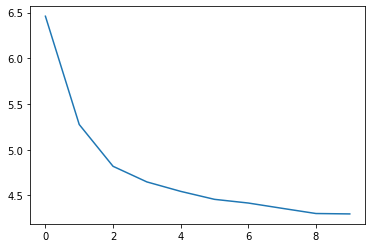

In [7]:
import matplotlib.pyplot as plt
plt.plot(loss_history)

In [21]:
##saving the model
PATH = 'retina_r2unet_256_16_msef2.pth'
torch.save(u_net.state_dict(), PATH)
##loading the model
# model = U_Net()
# model.load_state_dict(torch.load(PATH))
# model.eval()

In [ ]:
#Showing 5 random segmentations
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torchvision

for i in range(2):
    idx = 1+np.random.randint(100)
    im1 = Image.open('data/training/' + str(idx)  + '_orig.jpg')
    im2 = Image.open('data/training/' + str(idx)  + '_rot.jpg')
    im3 = Image.open('data/training/' + str(idx)  + '_noise.jpg')

    s1 = torchvision.transforms.ToTensor()(im1).unsqueeze(0)
    s2 = torchvision.transforms.ToTensor()(im2).unsqueeze(0)
    s3 = torchvision.transforms.ToTensor()(im3).unsqueeze(0)

    pred1 = model(s1).cpu().detach().numpy()
    pred2 = model(s2).cpu().detach().numpy()
    pred3 = model(s3).cpu().detach().numpy()

    f = plt.figure()
    f.add_subplot(2,3, 1)
    plt.imshow(im1)
    f.add_subplot(2,3, 2)
    plt.imshow(im2)
    f.add_subplot(2,3, 3)
    plt.imshow(im3)
    f.add_subplot(2,3, 4)
    plt.imshow(pred1[0][0],cmap='gray')
    f.add_subplot(2,3, 5)
    plt.imshow(pred2[0][0],cmap='gray')
    f.add_subplot(2,3, 6)
    plt.imshow(pred3[0][0],cmap='gray')

In [ ]:
for epoch in range(10):
    train_loss = 0.0
    for i,data in enumerate(tr):
        x, y = data
        optimizer.zero_grad()
        y_pred = u_net(x)
        loss = F.mse_loss(y_pred, y)
        x = loss.item()
        train_loss += x
        if (i%10==0):
            print('(%d, %5d) item-loss: %.9f'%(epoch + 1, i + 1, x))
        loss.backward()
        optimizer.step()   
    print('[%d] epoch-loss: %.9f'%(epoch + 1, train_loss))
    loss_history.append(train_loss)
print('Finished Training')

In [ ]:
for epoch in range(10):
    train_loss = 0.0
    for i,data in enumerate(tr):
        x, y = data
        optimizer.zero_grad()
        y_pred = u_net(x)
        loss = F.mse_loss(y_pred, y)
        x = loss.item()
        train_loss += x
        if (i%10==0):
            print('(%d, %5d) item-loss: %.9f'%(epoch + 1, i + 1, x))
        loss.backward()
        optimizer.step()   
    print('[%d] epoch-loss: %.9f'%(epoch + 1, train_loss))
    loss_history.append(train_loss)
print('Finished Training')

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_history)

In [ ]:
##saving the model
PATH = 'model/retina_unet_256_16_msef2.pth'
# torch.save(u_net.state_dict(), PATH)
##loading the model
model = U_Net()
model.load_state_dict(torch.load(PATH))
model.eval()

In [ ]:
#Showing 2 random segmentations
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torchvision

for i in range(2):
    idx = np.random.randint(100)
    im1 = Image.open('data/training/' + str(idx)  + '_orig.jpg')
    im2 = Image.open('data/training/' + str(idx)  + '_rot.jpg')
    im3 = Image.open('data/training/' + str(idx)  + '_noise.jpg')

    s1 = torchvision.transforms.ToTensor()(im1).unsqueeze(0)
    s2 = torchvision.transforms.ToTensor()(im2).unsqueeze(0)
    s3 = torchvision.transforms.ToTensor()(im3).unsqueeze(0)

    pred1 = model(s1).cpu().detach().numpy()
    pred2 = model(s2).cpu().detach().numpy()
    pred3 = model(s3).cpu().detach().numpy()

    f = plt.figure()
    f.add_subplot(2,3, 1)
    plt.imshow(im1)
    f.add_subplot(2,3, 2)
    plt.imshow(im2)
    f.add_subplot(2,3, 3)
    plt.imshow(im3)
    f.add_subplot(2,3, 4)
    plt.imshow(pred1[0][0],cmap='gray')
    f.add_subplot(2,3, 5)
    plt.imshow(pred2[0][0],cmap='gray')
    f.add_subplot(2,3, 6)
    plt.imshow(pred3[0][0],cmap='gray')

# Results on Test Data

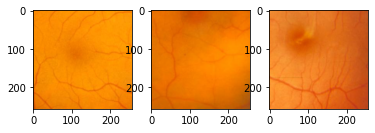

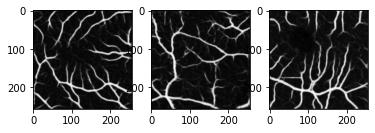

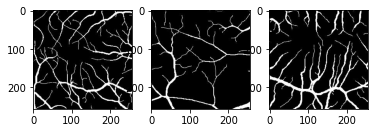

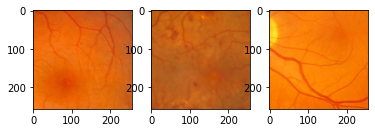

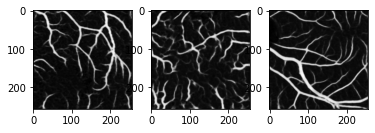

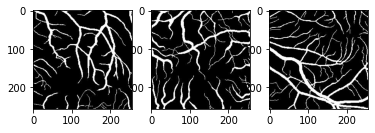

In [29]:
#Showing 2 random segmentations
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torchvision

for i in range(2):
    idx = 1+np.random.randint(20)
    idx2 = 1+np.random.randint(20)
    idx3 = 1+np.random.randint(20)
    im1 = Image.open('data/validation/' + str(idx)  + '_orig.jpg')
    im2 = Image.open('data/validation/' + str(idx2)  + '_orig.jpg')
    im3 = Image.open('data/validation/' + str(idx3)  + '_orig.jpg')
    im4 = Image.open('data/validation_manual/' + str(idx)  + '_orig.jpg')
    im5 = Image.open('data/validation_manual/' + str(idx2)  + '_orig.jpg')
    im6 = Image.open('data/validation_manual/' + str(idx3)  + '_orig.jpg')

    s1 = torchvision.transforms.ToTensor()(im1).unsqueeze(0)
    s2 = torchvision.transforms.ToTensor()(im2).unsqueeze(0)
    s3 = torchvision.transforms.ToTensor()(im3).unsqueeze(0)

    pred1 = u_net(s1.cuda()).cpu().detach().numpy()
    pred2 = u_net(s2.cuda()).cpu().detach().numpy()
    pred3 = u_net(s3.cuda()).cpu().detach().numpy()

    f = plt.figure()
    f.add_subplot(1,3, 1)
    plt.imshow(im1)
    f.add_subplot(1,3, 2)
    plt.imshow(im2)
    f.add_subplot(1,3, 3)
    plt.imshow(im3)
    f = plt.figure()
    f.add_subplot(1,3, 1)
    plt.imshow(pred1[0][0],cmap='gray')
    f.add_subplot(1,3, 2)
    plt.imshow(pred2[0][0],cmap='gray')
    f.add_subplot(1,3, 3)
    plt.imshow(pred3[0][0],cmap='gray')
    f = plt.figure()
    f.add_subplot(1,3, 1)
    plt.imshow(im4,cmap='gray')
    f.add_subplot(1,3, 2)
    plt.imshow(im5,cmap='gray')
    f.add_subplot(1,3, 3)
    plt.imshow(im6,cmap='gray')

In [11]:
!pwd

/content/Medical-Image-Computing


In [23]:
use_gpu=True

In [24]:
def evaluate():
    tp,tn,fp,fn=0,0,0,0
    y_true, y_pred  = [], []
    with torch.no_grad():
        for i,data in enumerate(val):
            x, y = data
            if use_gpu:
                x, y = x.cuda(), y.cuda()
            # ground truth
            true_arr=np.round(y.cpu().numpy())
            true_arr=true_arr[:,0,:,:].flatten()
            y = list(np.round(y.cpu().numpy()))
            y_true += y
#             print(y)

            pred = u_net(x)
            # predicted label
#             print(np.round(pred.cpu().numpy()).shape)
            pred_arr=np.round(pred.cpu().numpy())
#             print(pred_arr[:,0,:,:].shape)
            pred_arr=pred_arr[:,0,:,:].flatten()
            pred = list(np.round(pred.cpu().numpy()))
            y_pred += pred
            eq=np.where(pred_arr==true_arr)
            neq=np.where(pred_arr!=true_arr)
            tp+=np.sum(true_arr[eq]==1)
            tn+=np.sum(true_arr[eq]==0)
            fn+=np.sum(true_arr[neq]==1)
            fp+=np.sum(true_arr[neq]==0)
#             print(len(pred_arr),len(true_arr))
#             print(pred)
#             break
        
    # calculating overall accuracy
    num_correct = 0
    num_pix = np.shape(y_true[0])[0]*np.shape(y_true[0])[1]*np.shape(y_true[0])[2]
    for i in range(len(y_true)):
        num_correct += np.sum(y_pred[i]==y_true[i])

    acc = num_correct/(len(y_true)*num_pix)
    sen = tp / (tp + fn)
    spec=tn/ (tn + fp)
    print(tp,tn,fp,fn)
    print("Accuracy: ", acc)
    print("Sensitivity: ", sen)
    print("Specificity  ", spec)
    
    return acc
evaluate()

297540 3369791 33197 231632
Accuracy:  0.9326505025227865
Sensitivity:  0.5622746479405561
Specificity   0.9902447496141626


0.9326505025227865